In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from scipy.stats import gaussian_kde
from sklearn.linear_model import ElasticNet


In [3]:
customers = pd.read_csv('Ecommerce Customers.csv')

In [6]:
customers = customers.drop(['Email', 'Address', 'Avatar'], axis=1)


In [4]:
print(customers.shape)
print(customers.describe())
print(customers.info())

(500, 8)
       Avg. Session Length  Time on App  Time on Website  \
count           500.000000   500.000000       500.000000   
mean             33.053194    12.052488        37.060445   
std               0.992563     0.994216         1.010489   
min              29.532429     8.508152        33.913847   
25%              32.341822    11.388153        36.349257   
50%              33.082008    11.983231        37.069367   
75%              33.711985    12.753850        37.716432   
max              36.139662    15.126994        40.005182   

       Length of Membership  Yearly Amount Spent  
count            500.000000           500.000000  
mean               3.533462           499.314038  
std                0.999278            79.314782  
min                0.269901           256.670582  
25%                2.930450           445.038277  
50%                3.533975           498.887875  
75%                4.126502           549.313828  
max                6.922689           765.

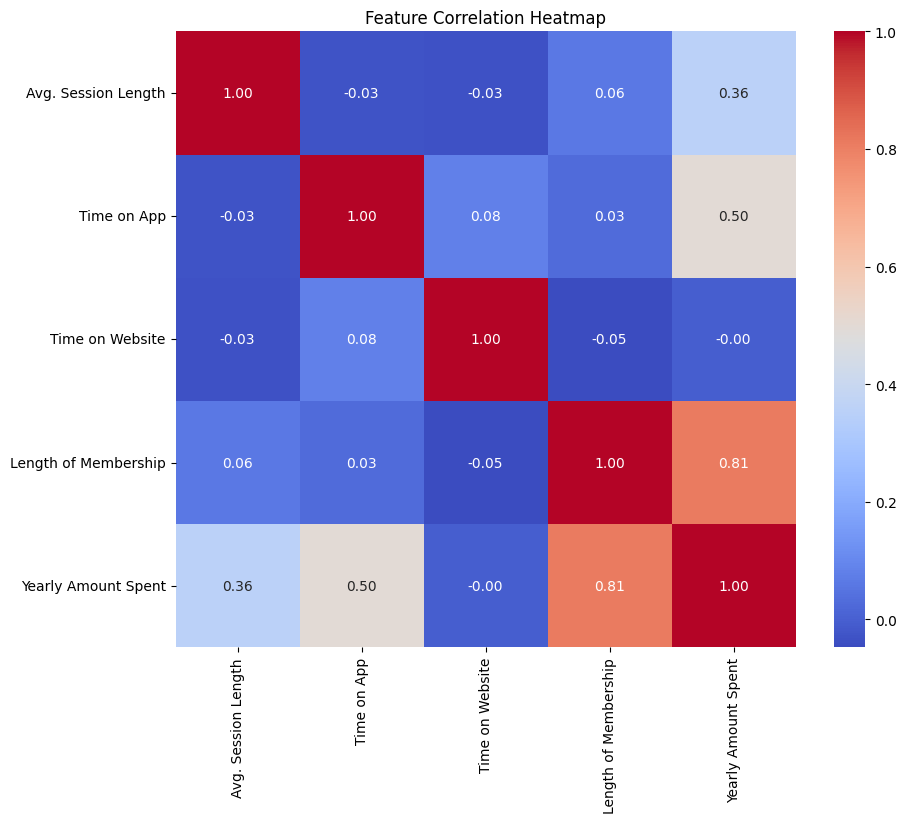

In [7]:
plt.figure(figsize=(10,8))
sns.heatmap(customers.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Heatmap')
plt.show()

In [10]:
y = customers['Yearly Amount Spent']
X = customers.drop('Yearly Amount Spent', axis=1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)


In [12]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
pred_lr = lr.predict(X_test_scaled)

In [14]:
ridge = Ridge(alpha=1.0)
ridge.fit(X_train_scaled, y_train)
pred_ridge = ridge.predict(X_test_scaled)

In [15]:
lasso = Lasso(alpha=0.01)
lasso.fit(X_train_scaled, y_train)
pred_lasso = lasso.predict(X_test_scaled)

In [22]:
elastic = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic.fit(X_train_scaled, y_train)
pred_elastic = elastic.predict(X_test_scaled)

In [23]:
poly_pipeline = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2, include_bias=False)),
    ('scaler', StandardScaler()),
    ('lin_reg', LinearRegression())
])


In [24]:
poly_pipeline.fit(X_train, y_train)
pred_poly = poly_pipeline.predict(X_test)


In [25]:
def evaluate_model(y_true, y_pred, model_name):
    print(f"--- {model_name} ---")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("R2 Score:", r2_score(y_true, y_pred))
    print()

In [26]:
evaluate_model(y_test, pred_lr, "Linear Regression")
evaluate_model(y_test, pred_ridge, "Ridge Regression")
evaluate_model(y_test, pred_lasso, "Lasso Regression")
evaluate_model(y_test, pred_elastic, "ElasticNet Regression")
evaluate_model(y_test, pred_poly, "Polynomial Regression")


--- Linear Regression ---
MAE: 7.228148653430843
MSE: 79.81305165097434
RMSE: 8.933815066978628
R2 Score: 0.9890046246741234

--- Ridge Regression ---
MAE: 7.244352267448448
MSE: 80.16040927389088
RMSE: 8.953234570471773
R2 Score: 0.988956771254698

--- Lasso Regression ---
MAE: 7.228138450826867
MSE: 79.8422888261561
RMSE: 8.935451237970923
R2 Score: 0.9890005968402298

--- ElasticNet Regression ---
MAE: 7.264951338703425
MSE: 80.51405740062786
RMSE: 8.972962576575691
R2 Score: 0.9889080512295101

--- Polynomial Regression ---
MAE: 7.432195703827268
MSE: 85.34745505511988
RMSE: 9.238368636026594
R2 Score: 0.9882421824247091



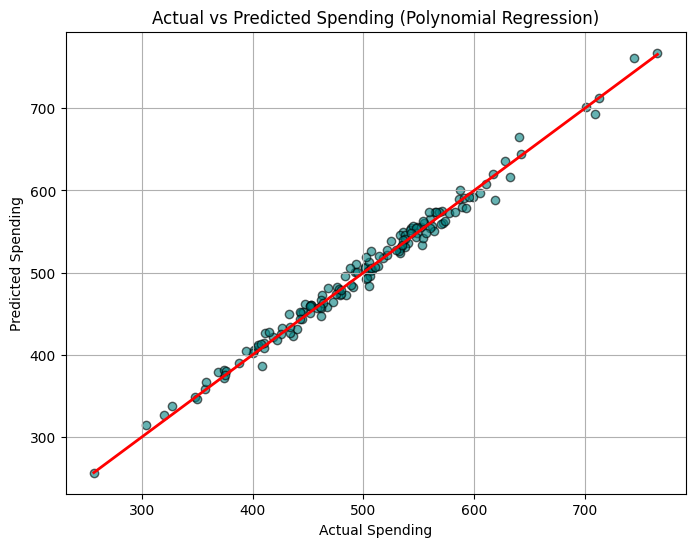

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, pred_poly, alpha=0.6, color='teal', edgecolors='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.xlabel('Actual Spending')
plt.ylabel('Predicted Spending')
plt.title('Actual vs Predicted Spending (Polynomial Regression)')
plt.grid(True)
plt.show()

In [28]:
errors = y_test - pred_poly
density = gaussian_kde(errors)
xs = np.linspace(errors.min(), errors.max(), 200)


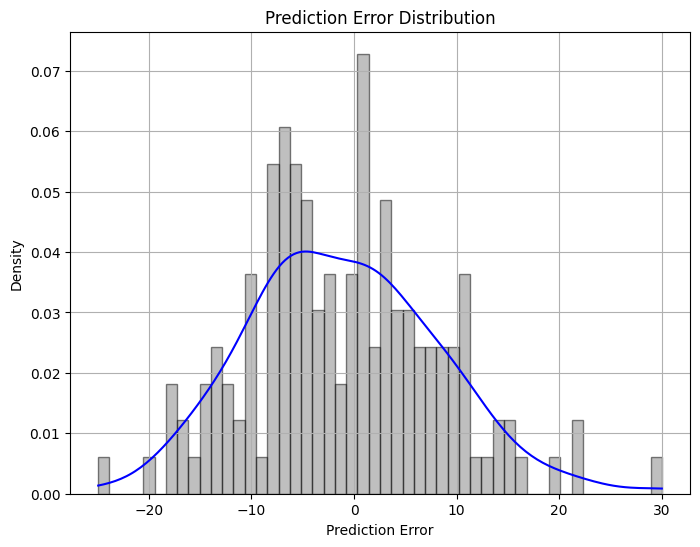

In [29]:
plt.figure(figsize=(8,6))
plt.hist(errors, bins=50, density=True, color='gray', edgecolor='black', alpha=0.5)
plt.plot(xs, density(xs), color='blue')
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Density')
plt.grid(True)
plt.show()

In [30]:
coefficients = pd.DataFrame(lr.coef_, X.columns, columns=['Coefficient'])
print(coefficients)


                      Coefficient
Avg. Session Length     26.042651
Time on App             36.674257
Time on Website          0.185039
Length of Membership    60.202360
